## RMSProp algorithm using SGD

In [1]:
import pandas as pd
import math

In [2]:
l1=[0.2,0.4,0.6,0.8]
l2=[3.4,3.8,4.2,4.8]
d={'x':l1,'y':l2}
data=pd.DataFrame(d)

In [3]:
data

,x,y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.8


In [4]:
m=1
c=-1
l=0.1
r=0.9
E=10**(-8)
E2gmt=0
E2gct=0
e_list=[]

In [5]:
def y_value(m,c,x):
    return m*x+c

In [6]:
def error(y_actual,y_predicted):
    return 0.5*(y_actual-y_predicted)**2

In [8]:
def gradient(m,c,y_actual,x,E2gmt,E2gct):
    g_m=(y_actual-m*x-c)*(-1)*x
    g_c=(y_actual-m*x-c)*(-1)
    E2gmt=r*E2gmt+(1-r)*(g_m**2)
    E2gct=r*E2gct+(1-r)*(g_c**2)
    
    m=m-((l*g_m)/math.sqrt(E2gmt+E))
    c=c-((l*g_c)/math.sqrt(E2gct+E))
    return m,c,E2gmt,E2gct

In [9]:
for i in range(30):
    for sample in range(len(data)):
        y_predicted=y_value(m,c,data['x'][sample])
        y_actual=data['y'][sample]
        e=error(y_actual,y_predicted)
        m,c,E2gmt,E2gct=gradient(m,c,y_actual,data['x'][sample],E2gmt,E2gct)
        e_list.append(e)

In [10]:
e_list

[8.82,
 7.830037000353915,
 6.851378459387227,
 6.4794068222403665,
 4.817611690814287,
 4.3057079673468195,
 3.7172633235234835,
 3.5452621167758696,
 3.235434827541091,
 2.692806726227434,
 2.1420091702568453,
 1.9570952688560679,
 2.230806482598853,
 1.688542640765574,
 1.1906613101405903,
 1.0093765640197003,
 1.540373224236432,
 1.0294216468584618,
 0.606948713156688,
 0.4542667957922508,
 1.0586859585169544,
 0.599888668622352,
 0.26669001188541414,
 0.15855043015263287,
 0.7274091405938433,
 0.3310674828980261,
 0.09005593309632162,
 0.030754708735670447,
 0.5070008701660572,
 0.1734807718435864,
 0.016864918442277065,
 3.592757059186809e-05,
 0.3670954614934626,
 0.08848259176562413,
 2.8206265869008545e-05,
 0.012237383765041118,
 0.28316732004749184,
 0.046480340726123566,
 0.005908853695057138,
 0.032123099400537335,
 0.23554062349402732,
 0.027094059070842003,
 0.015437016222889687,
 0.0439600654171044,
 0.20905653774136967,
 0.018290634463557328,
 0.02173127270414995,
 0.0

Text(0.5, 0, 'steps')

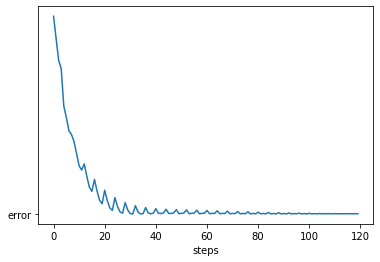

In [11]:
import matplotlib.pyplot as plt
plt.plot(e_list)
plt.plot("error")
plt.xlabel("steps")

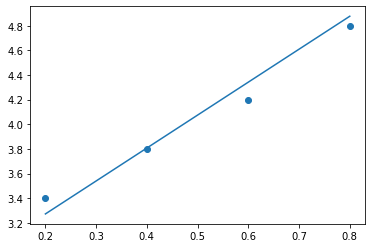

In [12]:
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],m*data['x']+c)